In [1]:
# 本章节主要关注激活函数的使用

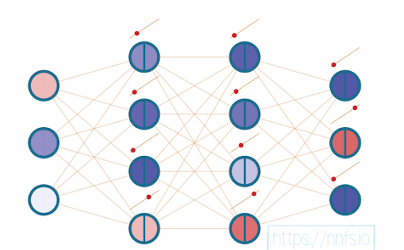


In [2]:
#当使用一个线性激活函数时，整个网络从头到尾依然是一个线性函数，依然无法拟合非线性函数

In [3]:
# 使用relu函数可以以积分的思想，用无数小线段去拟合曲线

In [4]:
import numpy as np 
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100] 
output = np.maximum(0, inputs) 
print(output) 

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [6]:
# ReLU activation 
class  Activation_ReLU: 
# Forward pass 
    def  forward(self, inputs): 
        # Calculate output values from input 
        self.output = np.maximum(0, inputs)

In [7]:
class Layer_Dense: 
 
    def __init__(self, n_inputs, n_neurons): 
        # Initialize weights and biases 
        pass  # using pass statement as a placeholder
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons))
 
    # Forward pass 
    def forward(self, inputs): 
        # Calculate output values from inputs, weights and biases 
        pass  # using pass statement as a placeholder
        self.output = np.dot(inputs, self.weights) + self.biases

In [9]:
from nnfs.datasets import spiral_data
import nnfs 
nnfs.init()
# Create dataset 
X, y = spiral_data(samples=100, classes=3) 
# Create Dense layer with 2 input features and 3 output values 
dense1 = Layer_Dense(2, 3) 
# Create ReLU activation (to be used with Dense layer): 
activation1 = Activation_ReLU() 
# Make a forward pass of our training data through this layer 
dense1.forward(X) 
# Forward pass through activation func. 
# Takes in output from previous layer 
activation1.forward(dense1.output)
print(activation1.output[:5]) 

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


In [11]:
# softmax 函数的numpy实现

In [13]:
# Values from the earlier previous when we described 
# what a neural network is 
layer_outputs = [4.8, 1.21, 2.385] 
# For each value in a vector, calculate the exponential value 
exp_values = np.exp(layer_outputs) 
print('exponentiated values:') 
print(exp_values) 
# Now normalize values 
norm_values = exp_values / np.sum(exp_values) 
print('normalized exponentiated values:') 
print(norm_values) 
print('sum of normalized values:', np.sum(norm_values)) 

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [14]:
# Softmax activation 
class Activation_Softmax: 
 
    # Forward pass 
    def forward(self, inputs): 
 
        # Get unnormalized probabilities 
        exp_values = np.exp(inputs - np.max(inputs, axis=1, 
                                            keepdims=True)) 
        # Normalize them for each sample 
        probabilities = exp_values / np.sum(exp_values, axis=1, 
                                            keepdims=True) 
 
        self.output = probabilities


In [15]:
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values 
dense1 = Layer_Dense(2, 3) 
# Create ReLU activation (to be used with Dense layer): 
activation1 = Activation_ReLU() 
# Create second Dense layer with 3 input features (as we take output 
# of previous layer here) and 3 output values 
dense2 = Layer_Dense(3, 3) 
# Create Softmax activation (to be used with Dense layer): 
activation2 = Activation_Softmax() 
# Make a forward pass of our training data through this layer 
dense1.forward(X) 
# Make a forward pass through activation function 
# it takes the output of first dense layer here 
activation1.forward(dense1.output) 
# Make a forward pass through second Dense layer 
# it takes outputs of activation function of first layer as inputs 
dense2.forward(activation1.output) 
# Make a forward pass through activation function 
# it takes the output of second dense layer here 
activation2.forward(dense2.output) 
# Let's see output of the first few samples: 
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
